# Your Very First Machine Learning (ML) Model: Logistic Regression

Dataset: [College Student Placement Factors Dataset](https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset) (`data/college_student_placement_dataset.csv`)

In [1]:
# Import our libraries.

from IPython.display import display

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

## Constants

It is a good programming practice to use constants to avoid repetition errors and to save yourself the effort of retyping the expression by _centralizing_ semantically identical values.

`DATASET_PATH` identifies the path to the dataset being loaded and operated on. `RANDOM_STATE` makes otherwise random operations reproducible run after run. Keep whatever value you set it to unless you want slightly different results.

In [2]:
DATASET_PATH = "../data/college_student_placement_dataset.csv"
RANDOM_STATE = 45  # DO NOT CHANGE THIS RANDOM STATE.

## Preliminary Inspection

See what the raw file looks like!

In [3]:
# Look at the first 5 lines of theraw contents of the file first.

with open(DATASET_PATH, "r") as file:
    for line_number in range(5):
        if line := file.readline():
            print(line)
        else:
            break  # Stop; there are less than 5 lines.

College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement

CLG0030,107,6.61,6.28,8,No,8,8,4,No

CLG0061,97,5.52,5.37,8,No,7,8,0,No

CLG0036,109,5.36,5.83,9,No,3,1,1,No

CLG0055,122,5.47,5.75,6,Yes,1,6,1,No



## Preliminary Load

Load the data. This is not the final form of the data which will be used, but it’s a `DataFrame` for further inspection so we can decide what to do with it next.

In [4]:
# Load the dataset into a pandas dataframe.

df = pd.read_csv(DATASET_PATH)
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


## Null Values Check
Inspect which varibles may be good / not good for using as features based on null values. 


In [5]:
# Identify which columns have null values.

df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

## Duplicate Rows Check
If so, remove the duplicates.

In [6]:
# Check to see if our data has any duplicate rows.
df.duplicated().sum()

#If there are duplicates but our dataset is very clean
#df.drop_duplicates(inplace=True)

np.int64(0)

Many clean… 😐

## Categorical Categories

What are the categories for the categorial-looking (i.e., non-numeric) columns?

In [7]:
df.info()

"""
Three Categorical Categories 
- College_ID
- Internship_Experience
- Placement
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


'\nThree Categorical Categories \n- College_ID\n- Internship_Experience\n- Placement\n'

## Feature Engineering

Non-numeric columns containing `'Yes'` and `'No'` do not work with logistic regression. Binary categories can be converted an integral type (`int`) with a value of 0 or 1.

In [8]:
df["Internship_Experience"] = df["Internship_Experience"].map({'Yes' : 1, "No" : 0})
df["Placement"] = df["Placement"].map({'Yes' : 1, "No" : 0})

❔ When should you use this versus using `pd.get_dummies`?

In [9]:
# You should be using pd.get_dummies() when categorical data has more than two values.

# Visualization with `sns.pairplot`

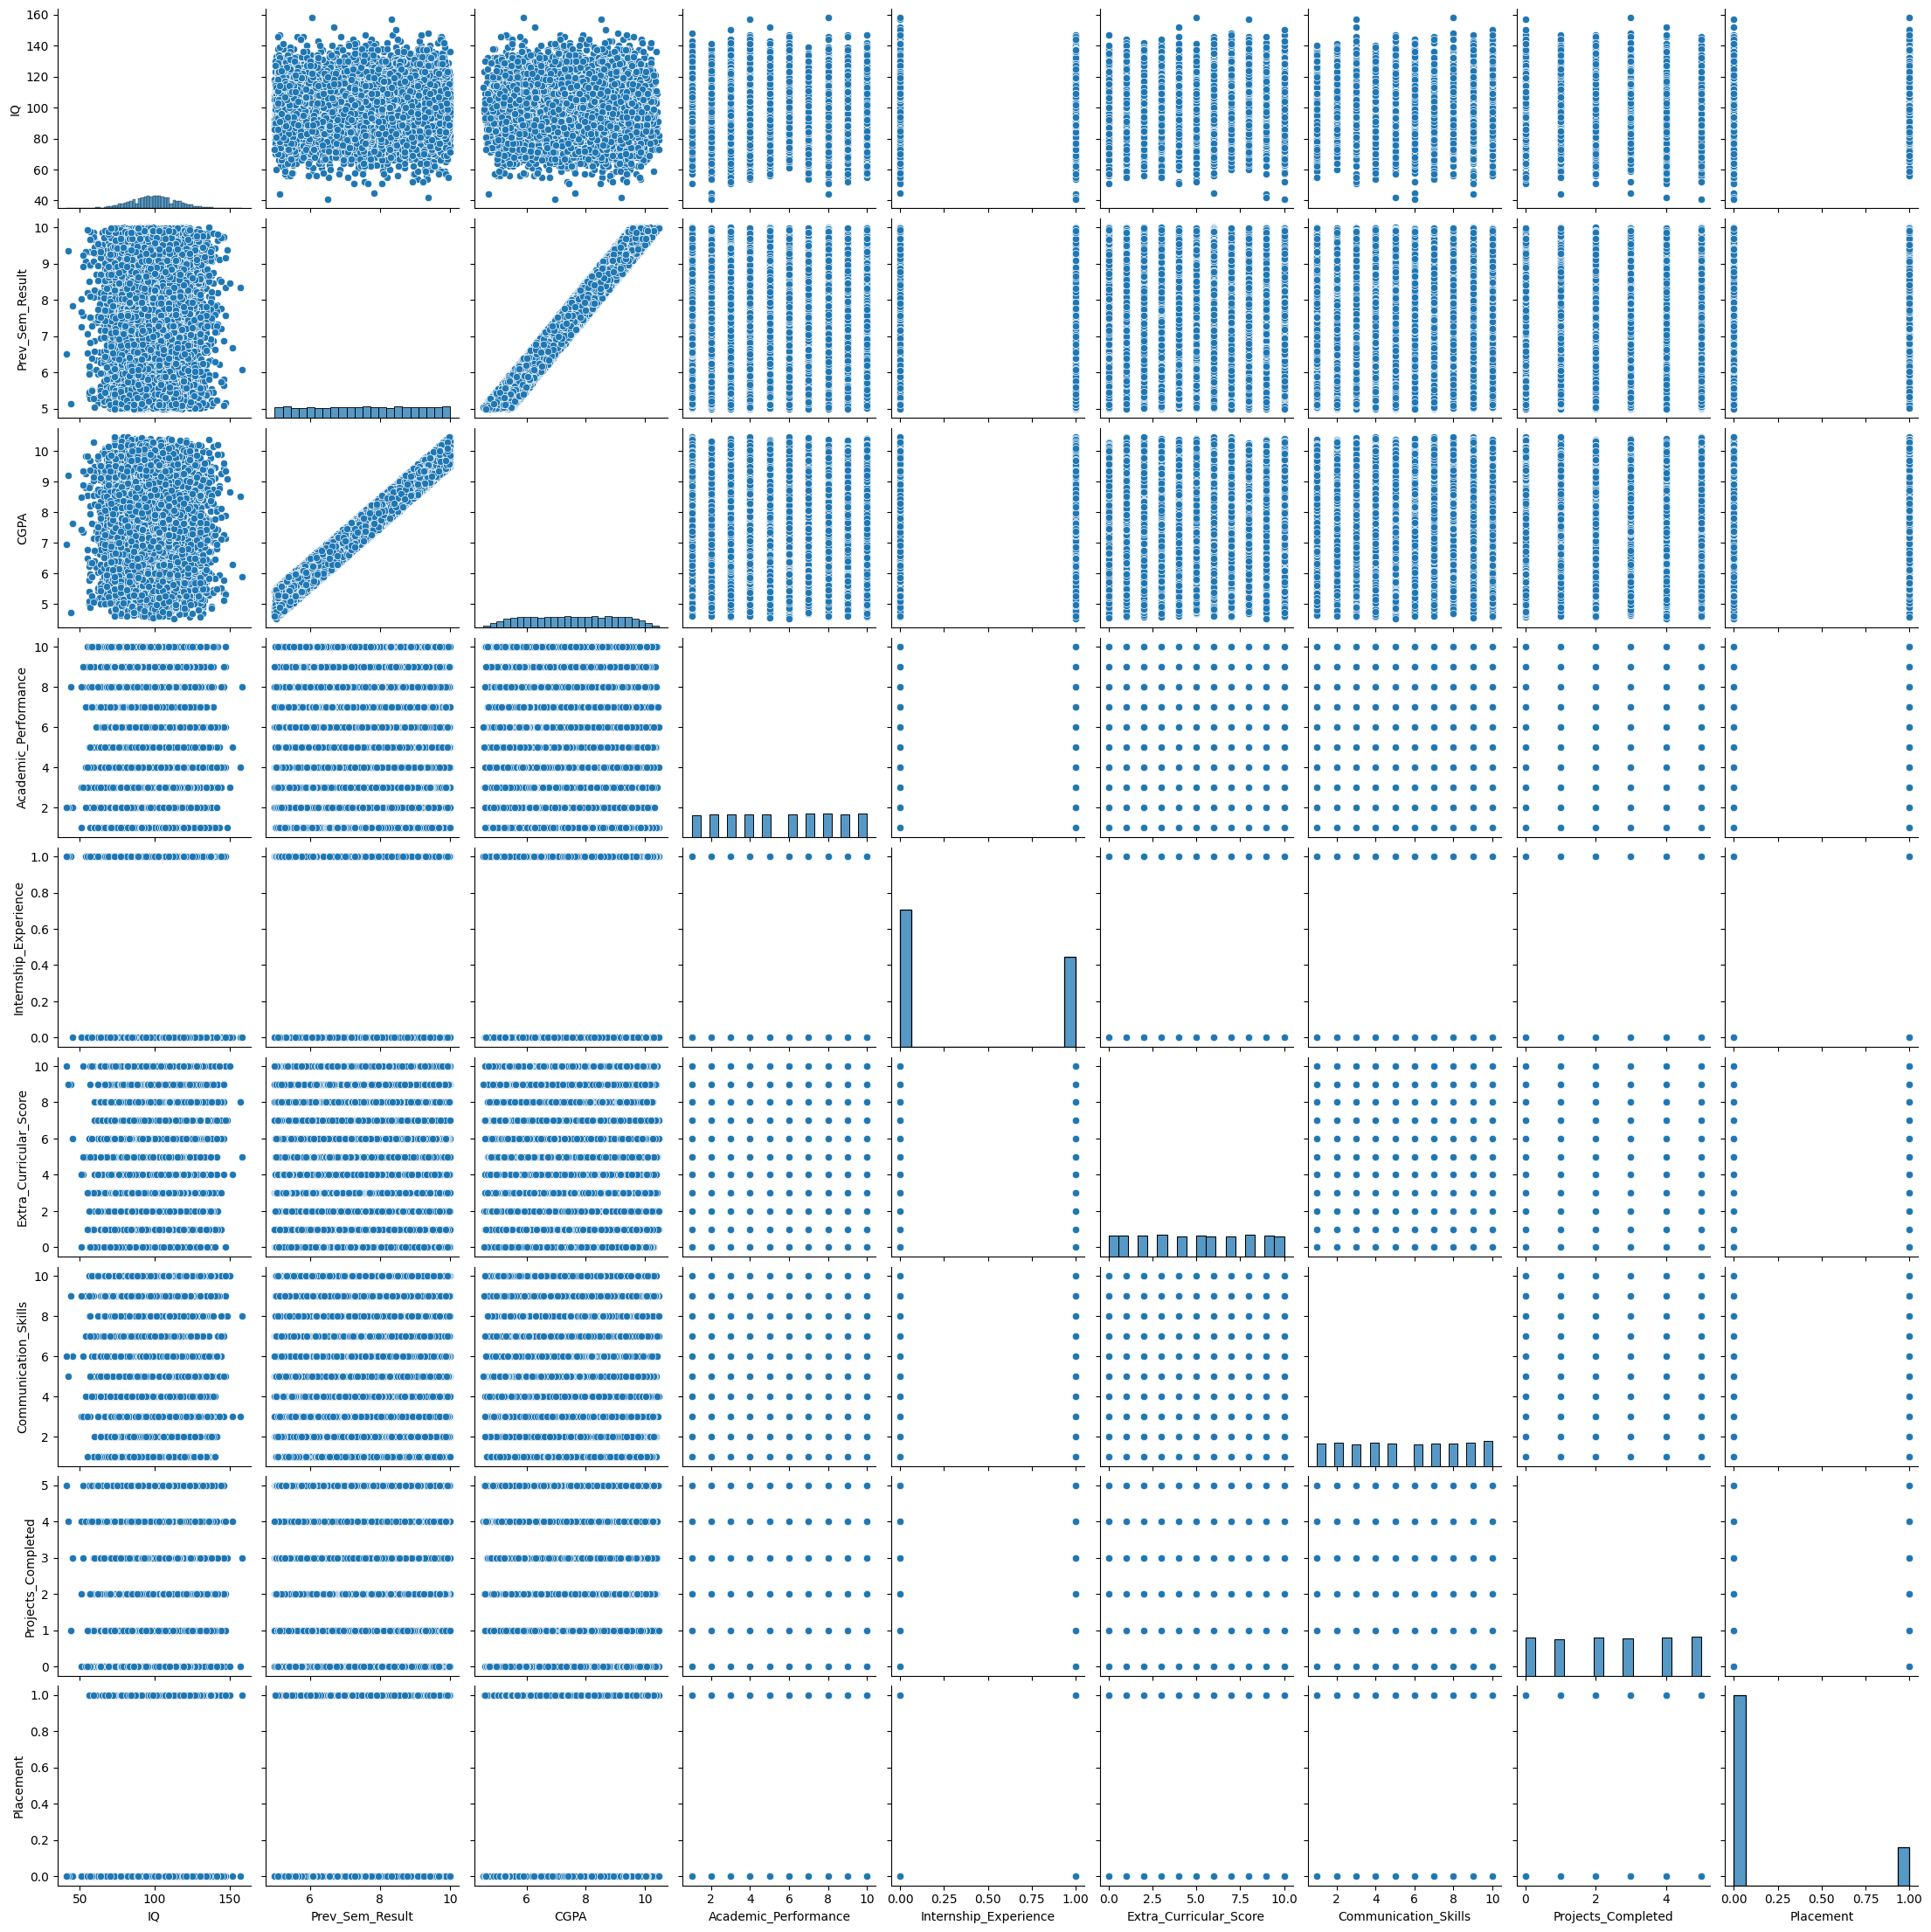

In [10]:
# Use sns.pariplot to visualize.
sns.pairplot(df)

## Feature Selection 

Choose the columns corresponding to the features _IQ_ and _internship experience_ to be your `X`. Target _placement_ as your `y`.

In [11]:
# Set X to the desired features.
selected_features = ["IQ","Internship_Experience"]
X = df[selected_features]

# Set y to be our target variable.
Y = df["Placement"]

## Split to Testing and Training Datasets 

In [12]:
# Split our data into testing and training pairs.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

# Print the length and width of our testing data.
print("X_train: %d rows, %d columns" % X_train.shape)
print("X_test: %d rows, %d columns" % X_test.shape)
print("Y_train: %d rows, 1 column" % Y_train.shape)
print("Y_test: %d rows, 1 column" % Y_test.shape)

X_train: 8000 rows, 2 columns
X_test: 2000 rows, 2 columns
Y_train: 8000 rows, 1 column
Y_test: 2000 rows, 1 column


## Build and train your model

Initialize an empty Logistic Regression model, and then fit your model to your training data. 

In [13]:
# Initalize our logistic regressionmodel.

model = LogisticRegression()

## Evaluation

Make predictions with your test data and save the predictions as `y_pred`.

In [14]:
# 1. Make predictions of your test data and save them as `y_pred`.
model.fit(X=X_train,y=Y_train)

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Calculate and print the accuracy, precision, recall, and F1 scores of your model.

In [15]:
# 2. Calculate and print the accuracy, precision, recall, and F1 scores of your model.

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)


print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print("F1 Score: %f" % f1)

Accuracy Score: 0.829000
Precision Score: 0.333333
Recall Score: 0.030120
F1 Score: 0.055249


Plot a confusion matrix of your predicted results.

Text(70.72222222222221, 0.5, 'Actual')

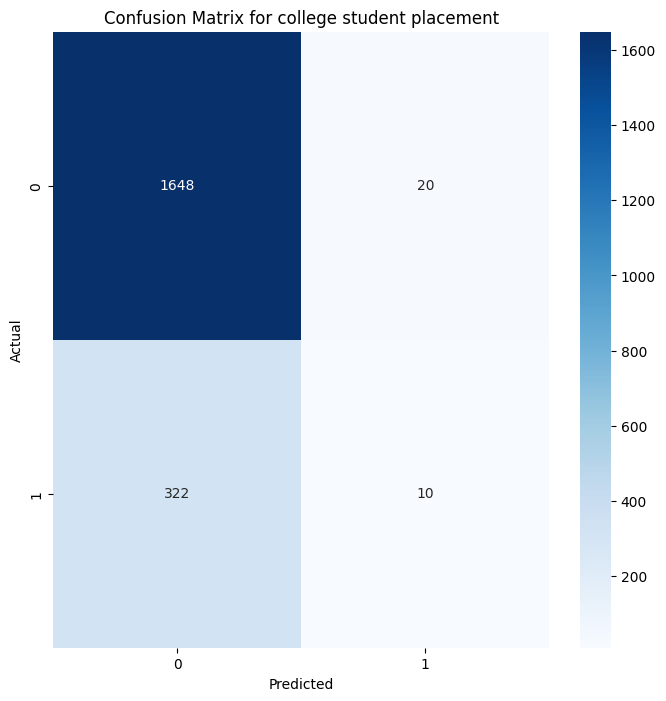

In [21]:
# 3. Plot a confusion matrix of your predicted results.

cm = confusion_matrix(Y_test,y_pred)

cm = cm.round(2)

tn,fp,fn,tp = confusion_matrix(Y_test,y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm,annot=True,fmt="g",cmap="Blues")
plt.title("Confusion Matrix for college student placement")
plt.xlabel("Predicted")
plt.ylabel("Actual")

How many true positives and true negatives did your model get?

In [19]:
# How many true positives and true negatives did your model get?

true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(Y_test,y_pred).ravel()
print('True Negatives: %d' % true_negatives)
print('True Positives: %d' % true_positives)

True Negatives: 1648
True Positives: 10


Such awful 😞

# What is the Most Important Feature
 
Use `statsmodel` to create a summary report. Interpret the results.

In [25]:
# Add a constant term to the independent variables.

X_sm = sm.add_constant(X)
# Fit the model.
logit_model = sm.Logit(Y, X_sm)
result = logit_model.fit()

# Print the summary and interpret the results.
print(result.summary())

"""
IQ is more likely to result in placment and is statiscally significant 
internship_Experience is less result in placement and also not very statiscally significant 
"""

Optimization terminated successfully.
         Current function value: 0.406531
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Placement   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 22 Oct 2025   Pseudo R-squ.:                 0.09524
Time:                        01:20:15   Log-Likelihood:                -4065.3
converged:                       True   LL-Null:                       -4493.3
Covariance Type:            nonrobust   LLR p-value:                1.408e-186
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.4077      0.224    -33.142      0.000      -7.846      -6.

'\nIQ is more likely to result in placment and is statiscally significant \ninternship_Experience is less result in placement and also not very statiscally significant \n'

# Extra Credit: Use your brain and make a better model (as in better scores).



In [ ]:
# Define the new X variable, and reuse the same y variable from before.


# Split our data into testing and training. Remember to use the same random state as you used before


# Initalize our model.


# Fit-train our model using our training data.


# Make new predicitions using our testing data.


# Print each of our scores to inspect performance.


# Plot the confusion matrix.